In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Taken from readme.txt downloaded with the STS-b benchmark data set

col_names = [
    "genre",
    "filename",
    "year",
    "id_from_source",
    "score",
    "sentence1",
    "sentence2",
    "extra1",
    "extra2"
]

In [45]:
sts_dataset = pd.read_csv('data/sts-train.csv', sep="\t", names=col_names)

In [53]:
sts_dataset.iloc[:]["score"].value_counts()

0.000    367
4.000    351
3.000    308
5.000    265
3.800    263
        ... 
0.067      1
0.727      1
1.700      1
1.778      1
4.330      1
Name: score, Length: 139, dtype: int64

(array([591., 298., 531., 347., 550., 425., 923., 649., 772., 625.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

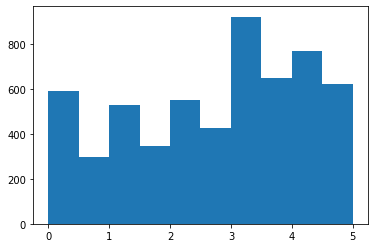

In [55]:
plt.hist(sts_dataset.iloc[:]["score"])

In [49]:
sts_dataset.iloc[:10][:]

,genre,filename,year,id_from_source,score,sentence1,sentence2,extra1,extra2
0,main-captions,MSRvid,2012test,1,5.00,A plane is taking off.,An air plane is taking off.,NaN,NaN
1,main-captions,MSRvid,2012test,4,3.80,A man is playing a large flute.,A man is playing a flute.,NaN,NaN
2,main-captions,MSRvid,2012test,5,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,NaN,NaN
3,main-captions,MSRvid,2012test,6,2.60,Three men are playing chess.,Two men are playing chess.,NaN,NaN
4,main-captions,MSRvid,2012test,9,4.25,A man is playing the cello.,A man seated is playing the cello.,NaN,NaN
5,main-captions,MSRvid,2012test,11,4.25,Some men are fighting.,Two men are fighting.,NaN,NaN
6,main-captions,MSRvid,2012test,12,0.50,A man is smoking.,A man is skating.,NaN,NaN
7,main-captions,MSRvid,2012test,13,1.60,The man is playing the piano.,The man is playing the guitar.,NaN,NaN
8,main-captions,MSRvid,2012test,14,2.20,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,NaN,NaN
9,main-captions,MSRvid,2012test,16,5.00,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,NaN,NaN


In [56]:
sts_text = sts_dataset[["sentence1","sentence2"]]

In [57]:
sts_text

,sentence1,sentence2
0,A plane is taking off.,An air plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.
...,...,...
5706,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5707,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5708,President heading to Bahrain,President Xi: China to continue help to fight ...
5709,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


In [107]:
text_list = sts_text.values.flatten()

In [108]:
text_list

array(['A plane is taking off.', 'An air plane is taking off.',
       'A man is playing a large flute.', ...,
       'China Scrambles to Reassure Jittery Stock Traders',
       'Putin spokesman: Doping charges appear unfounded',
       'The Latest on Severe Weather: 1 Dead in Texas After Tornado'],
      dtype=object)

In [76]:
import string
import nltk
from tqdm import tqdm

In [59]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/thesis-
[nltk_data]     server1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
from nltk.tokenize import word_tokenize

for i in tqdm(range(len(text_list))):
    current_sentence = str(text_list[i]).lower()
    text_list[i] = word_tokenize(current_sentence)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11422/11422 [00:00<00:00, 15060.85it/s]


In [110]:
text_list

array([list(['a', 'plane', 'is', 'taking', 'off', '.']),
       list(['an', 'air', 'plane', 'is', 'taking', 'off', '.']),
       list(['a', 'man', 'is', 'playing', 'a', 'large', 'flute', '.']),
       ...,
       list(['china', 'scrambles', 'to', 'reassure', 'jittery', 'stock', 'traders']),
       list(['putin', 'spokesman', ':', 'doping', 'charges', 'appear', 'unfounded']),
       list(['the', 'latest', 'on', 'severe', 'weather', ':', '1', 'dead', 'in', 'texas', 'after', 'tornado'])],
      dtype=object)

In [111]:
for i in tqdm(range(len(text_list))):
    sentence = text_list[i]
    
    filter_sentence = []
    
    for word in sentence:
        if not word in string.punctuation:
            if not word in stopwords.words():
                filter_sentence.append(word)

    text_list[i] = filter_sentence

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11422/11422 [04:54<00:00, 38.83it/s]


In [112]:
# Writing the responses to a txt file
with open('data/sts_sentences_text_clean_data.txt', 'w') as f:
    for sentence in text_list:
        # Check for empty sentences
        if not sentence == []:
            f.write("%s\n" % sentence)

In [115]:
sts_dataset[:6][:]

,genre,filename,year,id_from_source,score,sentence1,sentence2,extra1,extra2
0,main-captions,MSRvid,2012test,1,5.00,A plane is taking off.,An air plane is taking off.,NaN,NaN
1,main-captions,MSRvid,2012test,4,3.80,A man is playing a large flute.,A man is playing a flute.,NaN,NaN
2,main-captions,MSRvid,2012test,5,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,NaN,NaN
3,main-captions,MSRvid,2012test,6,2.60,Three men are playing chess.,Two men are playing chess.,NaN,NaN
4,main-captions,MSRvid,2012test,9,4.25,A man is playing the cello.,A man seated is playing the cello.,NaN,NaN
5,main-captions,MSRvid,2012test,11,4.25,Some men are fighting.,Two men are fighting.,NaN,NaN


TypeError: 'WordListCorpusReader' object is not callable